# Data Analysis Project
## Fast Food Restaurant in the US
### By Vent Data

## Introductions

The goal of this project is to analyze and visualize the Fast Food dataset to gain insights on the fast food business in the US, particularly the top 6 brands with the most locations in the US

## Gathering Data


We manually downloaded the dataset from Kaggle (https://www.kaggle.com/datafiniti/fast-food-restaurants) and uploaded to our Github page. 

The dataset contains a list of 10,000 fast food businesses from Datafiniti's Business Database updated between April 2018 and June 2018. The dataset includes the restaurant's address, city, latitude and longitude coordinates, name, and more.

## Import the Necessary Library and File

In [137]:
# LIBRARY

import numpy as np
import pandas as pd
import string
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *
import matplotlib.pyplot as plt
init_notebook_mode(connected=True)
import seaborn as sb
import plotly.graph_objs as go
from math import sin, cos, sqrt, atan2, radians

In [138]:
# Import Fast Food Data
url='https://raw.githubusercontent.com/ventdata/Fast-Food/master/fast-food-restaurants/Datafiniti_Fast_Food_Restaurants.csv'
data = pd.read_csv(url,sep=",")
data.head()
len(data)

10000

In [139]:
# Import state data
state_data = pd.read_csv('US_state_data.csv')
state_data.head()

,State,Square Miles (Land Area),Population
0,Alabama,50750,"4,849,000 (23rd)"
1,Alaska,570641,"737,000 (49th)"
2,Arizona,113642,"6,731,000 (15th)"
3,Arkansas,52075,"2,966,000 (33rd)"
4,California,155973,"38,803,000 (1st)"


This state data needs to be cleaned in these 2 ways:

State column needs to be changed to abbreviations (to match our fast food data)
Population rank needs to be removed

## Investigating the Data

### Remove Duplicate Data 

In [140]:
data.drop_duplicates(subset=['address','name'],inplace=True)
data.head()

,id,dateAdded,dateUpdated,address,categories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,American Restaurant and Fast Food Restaurant,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
2,AVwcopQoByjofQCxgfVa,2016-03-29T05:06:36Z,2018-06-26T02:59:52Z,206 Wears Valley Rd,Fast Food Restaurant,Pigeon Forge,US,us/tn/pigeonforge/206wearsvalleyrd/-864103396,35.803788,-83.580553,Taco Bell,37863,TN,https://www.yellowpages.com/pigeon-forge-tn/mi...,"http://www.tacobell.com,https://locations.taco..."
3,AVweXN5RByjofQCxxilK,2017-01-03T07:46:11Z,2018-06-26T02:59:51Z,3652 Parkway,Fast Food,Pigeon Forge,US,us/tn/pigeonforge/3652parkway/93075755,35.782339,-83.551408,Arby's,37863,TN,http://www.yellowbook.com/profile/arbys_163389...,"http://www.arbys.com,https://locations.arbys.c..."
4,AWQ6MUvo3-Khe5l_j3SG,2018-06-26T02:59:43Z,2018-06-26T02:59:43Z,2118 Mt Zion Parkway,Fast Food Restaurant,Morrow,US,us/ga/morrow/2118mtzionparkway/1305117222,33.562738,-84.321143,Steak 'n Shake,30260,GA,https://foursquare.com/v/steak-n-shake/4bcf77a...,http://www.steaknshake.com/locations/23851-ste...
5,AVwc57jLkufWRAb50ROs,2015-10-23T23:59:49Z,2018-06-26T02:59:43Z,9768 Grand River Ave,Fast Food Restaurant,Detroit,US,us/mi/detroit/9768grandriverave/-791445730,42.368823,-83.138251,Wendy's,48204,MI,https://foursquare.com/v/wendys/4bfec191e584c9...,http://www.wendys.com


### Fast Food Restaurants that has the Most Locations in the US

In [141]:
#Check which Top 10 Fast Food restaurants have the most outlets in the US

data['name'].value_counts().head(10)

McDonald's         1729
Taco Bell           933
Burger King         768
Subway              766
Arby's              585
Wendy's             580
Jack in the Box     315
Pizza Hut           228
Domino's Pizza      213
Dairy Queen         207
Name: name, dtype: int64

Text(0, 0.5, 'count')

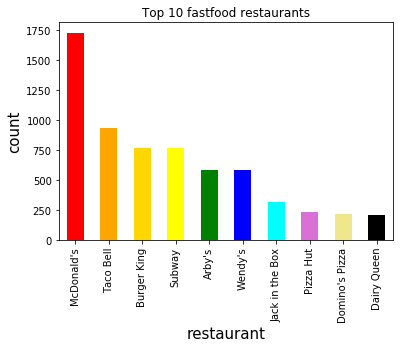

In [142]:
#Plot HISTOGRAM

restplt = data.name.value_counts()[:10].plot.bar(title="Top 10 fastfood restaurants"
            ,color=['red','orange','gold','yellow','green','blue','cyan','orchid','khaki','black'])
restplt.set_xlabel("restaurant", size=15)
restplt.set_ylabel("count", size=15)

### Cities with the most Fast Food Restaurants

In [143]:
#Check which Top 10 Cities with the most Fast Food restaurants

data['city'].value_counts().head(10)

Houston        99
Las Vegas      78
Columbus       67
Phoenix        66
Dallas         60
Orlando        60
Los Angeles    60
Chicago        56
Miami          55
San Antonio    51
Name: city, dtype: int64

Text(0, 0.5, 'count')

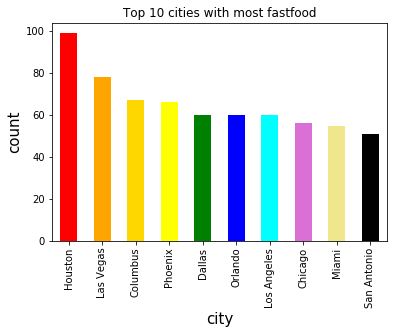

In [144]:
#Plot HISTOGRAM

cityplt = data.city.value_counts()[:10].plot.bar(title="Top 10 cities with most fastfood"
            ,color=['red','orange','gold','yellow','green','blue','cyan','orchid','khaki','black'])
cityplt.set_xlabel("city", size=15)
cityplt.set_ylabel("count", size=15)

### States with the Most Fast Food Restaurants

In [145]:
#Check which Top 10 States with the most Fast Food restaurants

data['province'].value_counts().head(10)

CA    1122
TX     753
FL     575
OH     503
GA     392
IL     373
PA     361
MI     351
NY     328
AZ     296
Name: province, dtype: int64

Text(0, 0.5, 'count')

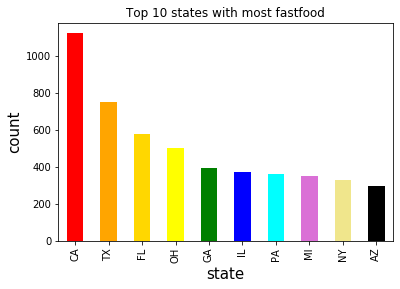

In [146]:
#Plot HISTOGRAM

stateplt = data.province.value_counts()[:10].plot.bar(title="Top 10 states with most fastfood"
            ,color=['red','orange','gold','yellow','green','blue','cyan','orchid','khaki','black'])
stateplt.set_xlabel("state", size=15)
stateplt.set_ylabel("count", size=15)

In [147]:
data["text"] = data["name"] + "," + data["province"] + "," + data["country"]

scl = [ [0, "rgb(5,10,172)"], [0.35, "rgb(40,60,190)"], [0.5, "rgb(70,100,245)"], 
       [0.6, "rgb(90,120,245)"], [0.7, "rgb(106,137, 247)"], [1, "rgb(220,220,220)"] ]

_data = [ dict(
        type = "scattergeo",
        locationmode = "USA-states",
        lon = data["longitude"],
        lat = data["latitude"],
        text = data["text"],
        mode = "markers",
        marker = dict(
            size = 4,
            opacity = 0.5,
            reversescale = True,
            autocolorscale = False,
            symbol = "circle",
            line = dict(
                width = .5,
                color = "rgba(102,102,102)"
            )))]

layout = dict(
        title = "Restaurants in the US",
        colorbar = True,
        geo = dict(
            scope = "usa",
            projection = dict(type = "albers usa"),
            showland = True,
            landcolor = "rgb(250,250,250)",
            subunitcolor = "rgb(217,217,217)",
            countrycolor = "rgb(217,217,217)",
            countrywidth = .5,
            subunitwidth = .5
        ),
    )

fig = dict(data = _data, layout = layout)
iplot(fig, validate=False, filename = "all restaurants")

## Data Clean-Up

### Mispelled Fast Food Names

In [148]:
d = {}
for col in data:
    d[col] = data[col].unique()
    
d['name'].sort()
d['name']

array(['7-Eleven', '90 Miles Cuban Cafe', 'A&W/Long John Silvers',
       "A's Ace Burgers", 'Abruzzi Pizza', 'Acropolis Gyro Palace',
       'Adobe Cantina Salsa', 'Ak Buffet', 'All About Burger',
       'Ameci Pizza & Pasta', "Andy's Frozen Custard", "Angelina's Pizza",
       "Ani's Chicken", "Arby's", "Arby's - Closed", 'Arbys',
       'Arctic Circle', "Arni's Crawfordsville",
       "Arthur Treacher's Fish & Chips", 'Au Bon Pain', "Auntie Anne's",
       "Auntie Anne's Pretzels", 'Ay Jalisco', 'B Good', 'B&D Burgers',
       "B's Pizza", 'B.GOOD', 'BURGERFI', 'Back Yard Burgers',
       'Backyard Grill', "Bad Daddy's Burger Bar",
       'Baja Fresh Mexican Grill', "Baker's Drive Thru",
       "Baker's Drive-thru", 'Band Box Diner', 'Barberitos',
       "Barro's Pizza", 'Baskin-Robbins', 'Batter Up', 'BeanThru',
       'Beef Villa', "Bell's Pizza", 'Belleria Pizzeria', "Ben & Jerry's",
       "Ben and Jerry's", "Bennidito's Pizza", 'Best Gyros',
       'Big House Burgers', 'Big Isl

In [149]:
# Rename mispelled Fast Foods Name

data['name'].replace('Arbys',"Arby's",inplace=True)
data['name'].replace("Auntie Anne's Pretzels","Auntie Anne's",inplace=True)
data['name'].replace("Baker's Drive-thru","Baker's Drive Thru",inplace=True)
data['name'].replace("Ben and Jerry's","Ben & Jerry's",inplace=True)
data['name'].replace("Bojangles' Famous Chicken 'n Biscuits",'Bojangles',inplace=True)
data['name'].replace('Burger King¬Æ','Burger King',inplace=True)
data['name'].replace('Capri Italian Restaurant','Capri Restaurant',inplace=True)
data['name'].replace("Carl's Jr / Green Burrito","Carl's Jr",inplace=True)
data['name'].replace("Carl's Jr.","Carl's Jr",inplace=True)
data['name'].replace("Carl's Jr. / Green Burrito","Carl's Jr",inplace=True)
data['name'].replace("Carl's Jr. / The Green Burrito","Carl's Jr",inplace=True)
data['name'].replace('Chipotle Mexican Grill','Chipotle',inplace=True)
data['name'].replace("Dunkin' Donuts",'Dunkin Donuts',inplace=True)
data['name'].replace('Five Guys Burgers And Fries','Five Guys',inplace=True)
data['name'].replace('Five Guys Burgers Fries','Five Guys',inplace=True)
data['name'].replace('Fosters Freeze',"Foster's Freeze",inplace=True)
data['name'].replace("Hardee's / Red Burrito",'Hardees',inplace=True)
data['name'].replace("Hardee's/red Burrito",'Hardees',inplace=True)
data['name'].replace('Jack in the Box -','Jack in the Box',inplace=True)
data['name'].replace('KFC - Kentucky Fried Chicken','KFC',inplace=True)
data['name'].replace('KFC/AW','KFC',inplace=True)
data['name'].replace('KFC/Long John Silvers','KFC',inplace=True)
data['name'].replace("Little Caesar's Pizza",'Little Caesars',inplace=True)
data['name'].replace('Little Caesars Pizza','Little Caesars',inplace=True)
data['name'].replace("Long John Silver's / AW","Long John Silver's",inplace=True)
data['name'].replace('Long John Silvers / A&W',"Long John Silver's",inplace=True)
data['name'].replace('Long John Silvers',"Long John Silver's",inplace=True)
data['name'].replace("McDonald's of Rolesville","McDonald's",inplace=True)
data['name'].replace('McDonalds',"McDonald's",inplace=True)
data['name'].replace("McDonalds's","McDonald's",inplace=True)
data['name'].replace("Mcdonald's","McDonald's",inplace=True)
data['name'].replace('Mcdonalds',"McDonald's",inplace=True)
data['name'].replace('Mcdonalds Whitehouse',"McDonald's",inplace=True)
data['name'].replace("Popeye's Louisiana Kitchen",'Popeyes',inplace=True)
data['name'].replace('Popeyes Chicken & Biscuits','Popeyes',inplace=True)
data['name'].replace('Popeyes Chicken Biscuits','Popeyes',inplace=True)
data['name'].replace('Popeyes Louisiana Kitchen','Popeyes',inplace=True)
data['name'].replace('Quiznos',"Quizno's",inplace=True)
data['name'].replace('Quiznos Sub',"Quizno's",inplace=True)
data['name'].replace("Raising Cane's Chicken Fingers","Raising Cane's",inplace=True)
data['name'].replace('Raising Canes',"Raising Cane's",inplace=True)
data['name'].replace("Rally's Hamburgers","Rally's",inplace=True)
data['name'].replace('Rallys',"Rally's",inplace=True)
data['name'].replace('Roma Pizza','Romas Pizza',inplace=True)
data['name'].replace('SONIC Drive In','SONIC Drive-In',inplace=True)
data['name'].replace('SUBWAY¬Æ','Subway',inplace=True)
data['name'].replace('SUBWAY','Subway',inplace=True)
data['name'].replace("Sonic America's Drive-In",'SONIC Drive-In',inplace=True)
data['name'].replace('Sonic Drive In','SONIC Drive-In',inplace=True)
data['name'].replace('Sonic Drive in','SONIC Drive-In',inplace=True)
data['name'].replace('Sonic Drive-In','SONIC Drive-In',inplace=True)
data['name'].replace('Steak N Shake',"Steak 'n Shake",inplace=True)
data['name'].replace('Taco Bell / KFC','Taco Bell',inplace=True)
data['name'].replace('Taco Bell/KFC','Taco Bell',inplace=True)
data['name'].replace('Taco Bell/Pizza Hut','Taco Bell',inplace=True)
data['name'].replace('Wienerschitzel','Wienerschnitzel',inplace=True)
data['name'].replace("Zaxby's Chicken Fingers & Buffalo Wings","Zaxby's",inplace=True)

In [150]:
# Re-Check which Top 10 Fast Food restaurants have the most outlets in the US

data['name'].value_counts().head(10)

McDonald's         1776
Taco Bell           937
Subway              838
Burger King         769
Arby's              588
Wendy's             580
Jack in the Box     316
Pizza Hut           228
Domino's Pizza      213
Dairy Queen         207
Name: name, dtype: int64

## Data Preparation

In [151]:
# Change State column in state data to abbreviations
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Palau': 'PW',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

state_data['state_abbrev'] = state_data['State'].map(us_state_abbrev)

In [152]:
#Check the result of abbreviating state name
state_data.head()

,State,Square Miles (Land Area),Population,state_abbrev
0,Alabama,50750,"4,849,000 (23rd)",AL
1,Alaska,570641,"737,000 (49th)",AK
2,Arizona,113642,"6,731,000 (15th)",AZ
3,Arkansas,52075,"2,966,000 (33rd)",AR
4,California,155973,"38,803,000 (1st)",CA


In [153]:
#Check datatypes of state_data
state_data.dtypes

State                       object
Square Miles (Land Area)     int64
Population                  object
state_abbrev                object
dtype: object

In [154]:
#Remove population rank from population column
state_data['Population'] = state_data['Population'].str.split('\s+(\S+)\s*').str[0]
state_data.head()

,State,Square Miles (Land Area),Population,state_abbrev
0,Alabama,50750,"4,849,000",AL
1,Alaska,570641,"737,000",AK
2,Arizona,113642,"6,731,000",AZ
3,Arkansas,52075,"2,966,000",AR
4,California,155973,"38,803,000",CA


In [155]:
#Replace , from population column and convert column to integer
state_data['Population'] = state_data['Population'].str.replace(",", "")
state_data['Population'] = state_data['Population'].astype(str).astype(int)
state_data.dtypes

State                       object
Square Miles (Land Area)     int64
Population                   int32
state_abbrev                object
dtype: object

### Join the Fast Food Data with the US State Data

In [156]:
data_with_state_info = data.join(state_data.set_index('state_abbrev'), on='province')
data_with_state_info['per_sq_mile'] = 1/data_with_state_info['Square Miles (Land Area)']
data_with_state_info['per_capita'] = 1/data_with_state_info['Population']

### Create New DataFrame for Top 6 Fast Food

In [157]:
# Create 6 new DataFrames

mcD = "McDonald's"
McDonald = data_with_state_info.query("name == @mcD")
TacoBell = data_with_state_info.query("name == 'Taco Bell'")
burger_king = data_with_state_info.query("name == 'Burger King'")
subway = data_with_state_info.query("name == 'Subway'")
arbys = data_with_state_info.loc[(data.name == "Arby's")]
wendys = data_with_state_info.loc[data.name == "Wendy's"]

# Analyzing and Visualizing Data

The questions we want to answer are: 

1. Which state/province and city has the most McDonald's restaurants?
2. Which state/province and city has the most Taco Bell restaurants?
3. Which state/province and city has the most Burger King restaurants?
4. Which state/province and city has the most Subway restaurants?
5. Which state/province and city has the most Arby's restaurants?
6. Which state/province and city has the most Wendy's restaurants?

### McDonald's

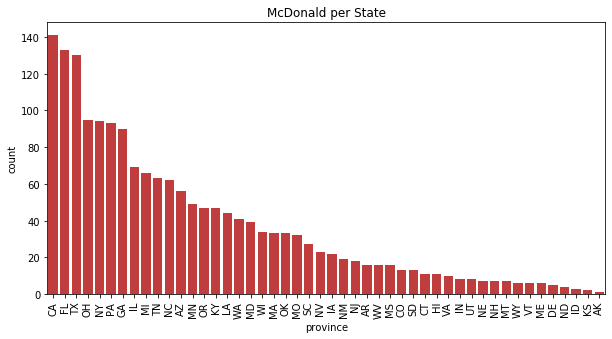

In [158]:
# State/province with the most McDonald's
plt.figure(figsize = [10,5])
base_color = sb.color_palette()[3]
state_order = McDonald['province'].value_counts().index
sb.countplot(data = McDonald, x = 'province', color = base_color, order = state_order)
plt.xticks(rotation=90)
plt.title('McDonald per State');

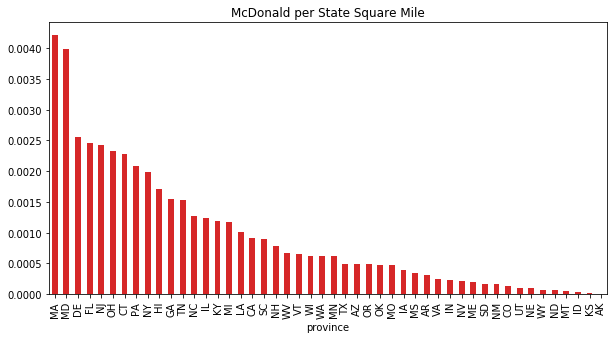

In [159]:
# McDonald's per square mile area of each state
grouped_mcd_area = McDonald.groupby('province')['per_sq_mile'].sum().sort_values(ascending=False)
plt.figure(figsize = [10,5])
grouped_mcd_area.plot.bar(color = base_color)
plt.title('McDonald per State Square Mile');

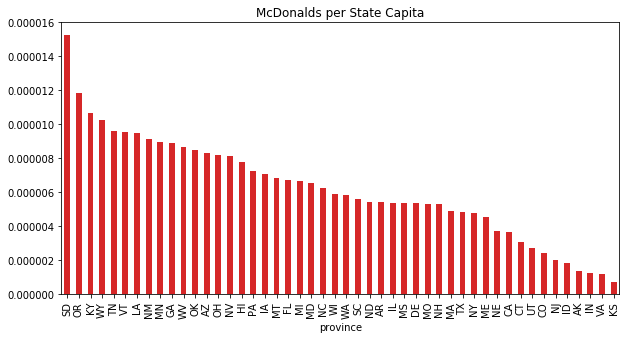

In [160]:
# McDonald's per capita of each state
grouped_mcd_capita = McDonald.groupby('province')['per_capita'].sum().sort_values(ascending=False)
plt.figure(figsize = [10,5])
grouped_mcd_capita.plot.bar(color = base_color)
plt.title('McDonalds per State Capita');

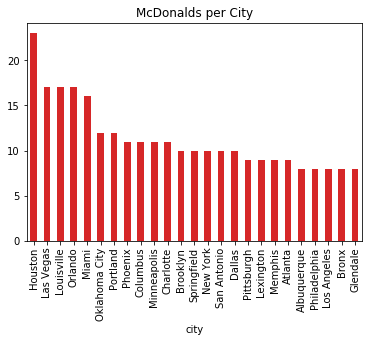

In [161]:
# City with the most McDonald's
top_mcd_city = McDonald.groupby('city')['city'].count().sort_values(ascending = False).head(25)
top_mcd_city.plot.bar(color = base_color)
plt.title('McDonalds per City');

In [162]:
mcd_lon = McDonald.longitude
mcd_lat = McDonald.latitude
mcd_city = McDonald.city

mcd_data = [ dict(
        type = "scattergeo",
        locationmode = "USA-states",
        lon = mcd_lon,
        lat = mcd_lat,
        mode = "markers",
        marker = dict(
            size = 4,
            opacity = 0.5,
            reversescale = True,
            autocolorscale = False,
            symbol = "circle",
            line = dict(
                width = .5,
                color = "rgba(207, 0, 15, 1)"
            )))]

mcd_layout = dict(
        title = "McDonald's Restaurants in the US",
        colorbar = True,
        geo = dict(
            scope = "usa",
            projection = dict(type = "albers usa"),
            showland = True,
            landcolor = "rgb(250,250,250)",
            subunitcolor = "rgb(217,217,217)",
            countrycolor = "rgb(217,217,217)",
            countrywidth = .5,
            subunitwidth = .5
        ),
    )

fig = dict(data = mcd_data, layout = mcd_layout)
iplot(fig, validate=False, filename = "mcd restaurants")

Summary:



### Taco Bell's 

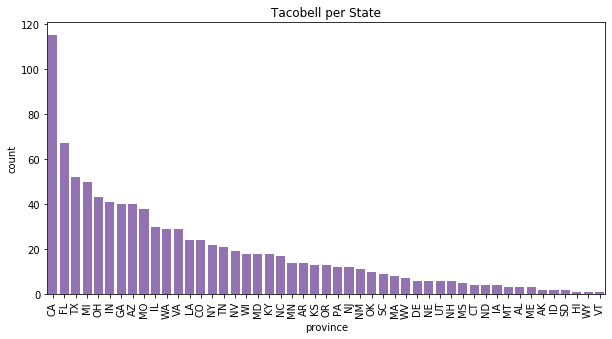

In [163]:
# State/province with the most Tacobell
plt.figure(figsize = [10,5])
base_color = sb.color_palette()[4]
state_order_taco = TacoBell['province'].value_counts().index
sb.countplot(data = TacoBell, x = 'province', color = base_color, order = state_order_taco)
plt.xticks(rotation=90)
plt.title('Tacobell per State');

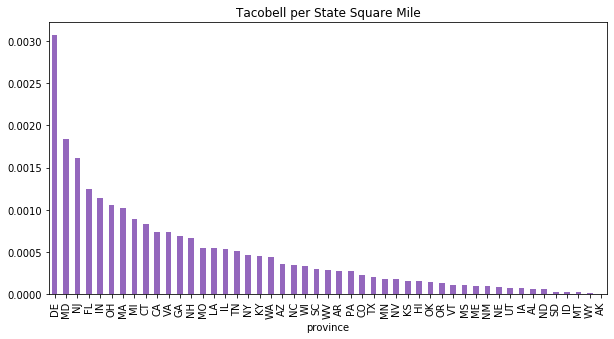

In [164]:
#Tacobell per square mile area of each state
grouped_tacobell_area = TacoBell.groupby('province')['per_sq_mile'].sum().sort_values(ascending=False)
plt.figure(figsize = [10,5])
grouped_tacobell_area.plot.bar(color = base_color)
plt.title('Tacobell per State Square Mile');

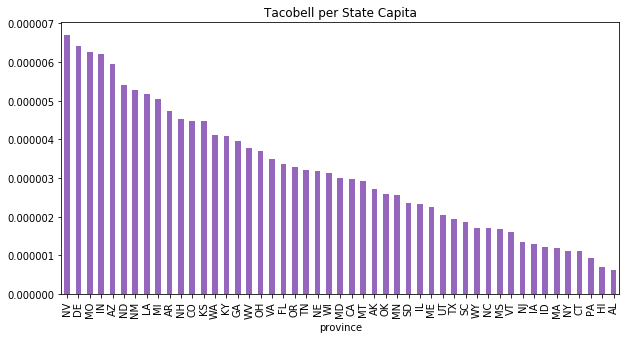

In [165]:
#Tacobell per capita of each state
grouped_tacobell_capita = TacoBell.groupby('province')['per_capita'].sum().sort_values(ascending=False)
plt.figure(figsize = [10,5])
grouped_tacobell_capita.plot.bar(color = base_color)
plt.title('Tacobell per State Capita');

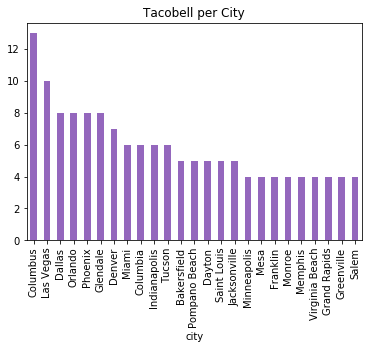

In [166]:
#City with the most Tacobell
top_tacobell_city = TacoBell.groupby('city')['city'].count().sort_values(ascending = False).head(25)
top_tacobell_city.plot.bar(color = base_color)
plt.title('Tacobell per City');

In [167]:
tcb_lon = TacoBell.longitude
tcb_lat = TacoBell.latitude
tcb_city = TacoBell.city

tcb_data = [ dict(
        type = "scattergeo",
        locationmode = "USA-states",
        lon = tcb_lon,
        lat = tcb_lat,
        mode = "markers",
        marker = dict(
            size = 4,
            opacity = 0.5,
            reversescale = True,
            autocolorscale = False,
            symbol = "circle",
            line = dict(
                width = .5,
                color = "rgba(154, 18, 179, 1)"
            )))]

tcb_layout = dict(
        title = "Taco Bell Restaurants in the US",
        colorbar = True,
        geo = dict(
            scope = "usa",
            projection = dict(type = "albers usa"),
            showland = True,
            landcolor = "rgb(250,250,250)",
            subunitcolor = "rgb(217,217,217)",
            countrycolor = "rgb(217,217,217)",
            countrywidth = .5,
            subunitwidth = .5
        ),
    )

fig = dict(data = tcb_data, layout = tcb_layout)
iplot(fig, validate=False, filename = "tcb restaurants")

Summary:


### Burger King 

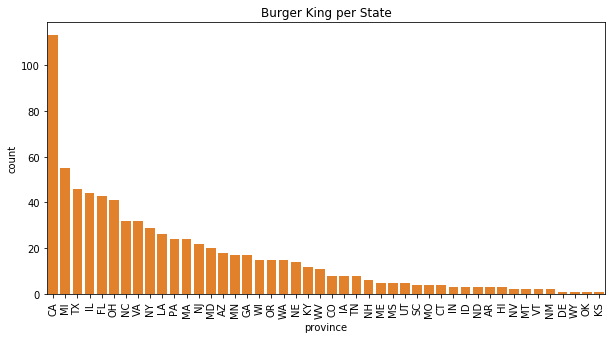

In [168]:
#State/province with the most Burger King
plt.figure(figsize = [10,5])
base_color = sb.color_palette()[1]
state_order = burger_king['province'].value_counts().index
sb.countplot(data = burger_king, x = 'province', color = base_color, order = state_order)
plt.xticks(rotation=90)
plt.title('Burger King per State');

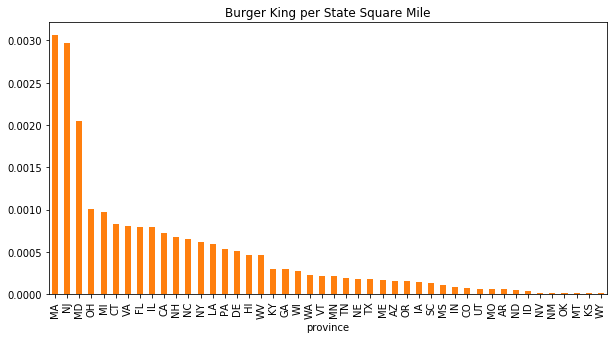

In [169]:
#Burger King per square mile area of each state
grouped_bk_area = burger_king.groupby('province')['per_sq_mile'].sum().sort_values(ascending=False)
plt.figure(figsize = [10,5])
grouped_bk_area.plot.bar(color = base_color)
plt.title('Burger King per State Square Mile');

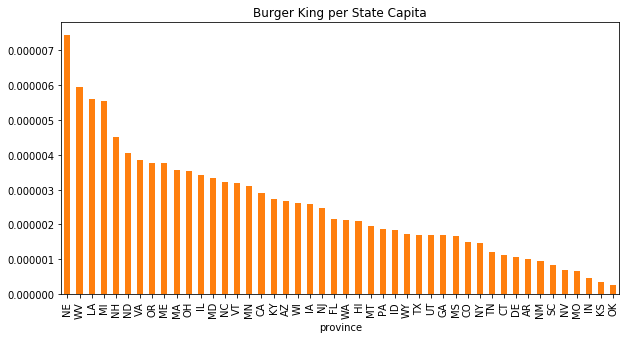

In [170]:
#Burger King per capita of each state
grouped_bk_capita = burger_king.groupby('province')['per_capita'].sum().sort_values(ascending=False)
plt.figure(figsize = [10,5])
grouped_bk_capita.plot.bar(color = base_color)
plt.title('Burger King per State Capita');

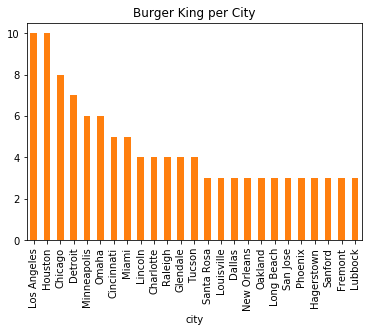

In [171]:
#City with the most Burger King
top_bk_city = burger_king.groupby('city')['city'].count().sort_values(ascending = False).head(25)
top_bk_city.plot.bar(color = base_color)
plt.title('Burger King per City');

In [172]:
bk_lon = burger_king.longitude
bk_lat = burger_king.latitude
bk_city = burger_king.city

bk_data = [ dict(
        type = "scattergeo",
        locationmode = "USA-states",
        lon = bk_lon,
        lat = bk_lat,
        mode = "markers",
        marker = dict(
            size = 4,
            opacity = 0.5,
            reversescale = True,
            autocolorscale = False,
            symbol = "circle",
            line = dict(
                width = .5,
                color = "rgba(230, 126, 34, 1)"
            )))]

bk_layout = dict(
        title = "Burger King Restaurants in the US",
        colorbar = True,
        geo = dict(
            scope = "usa",
            projection = dict(type = "albers usa"),
            showland = True,
            landcolor = "rgb(250,250,250)",
            subunitcolor = "rgb(217,217,217)",
            countrycolor = "rgb(217,217,217)",
            countrywidth = .5,
            subunitwidth = .5
        ),
    )

fig = dict(data = bk_data, layout = bk_layout)
iplot(fig, validate=False, filename = "bk restaurants")

Summary:

### Subway 

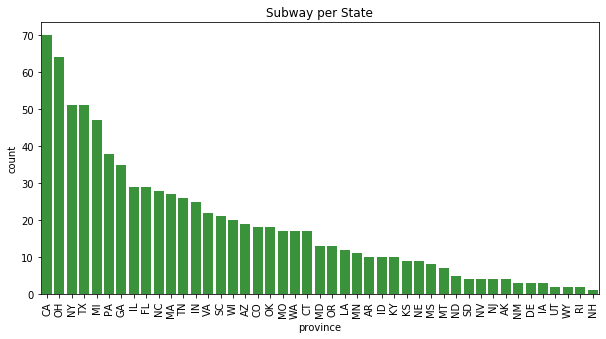

In [173]:
#State/province with the most Subway
plt.figure(figsize = [10,5])
base_color = sb.color_palette()[2]
state_order_sub = subway['province'].value_counts().index
sb.countplot(data = subway, x = 'province', color = base_color, order = state_order_sub)
plt.xticks(rotation=90)
plt.title('Subway per State');

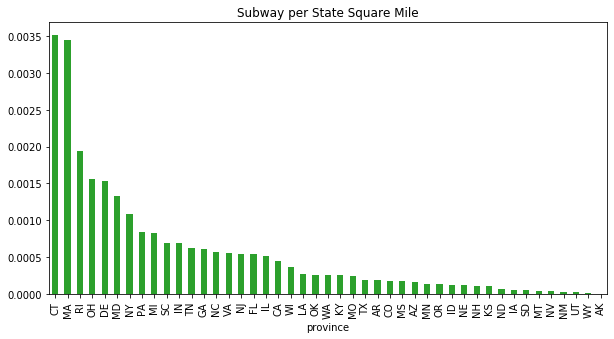

In [174]:
#Subway per square mile area of each state
grouped_subway_area = subway.groupby('province')['per_sq_mile'].sum().sort_values(ascending=False)
plt.figure(figsize = [10,5])
grouped_subway_area.plot.bar(color = base_color)
plt.title('Subway per State Square Mile');

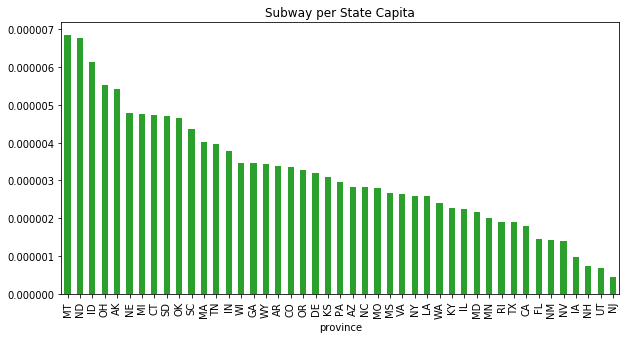

In [175]:

#Subway per capita of each state
grouped_subway_capita = subway.groupby('province')['per_capita'].sum().sort_values(ascending=False)
plt.figure(figsize = [10,5])
grouped_subway_capita.plot.bar(color = base_color)
plt.title('Subway per State Capita');

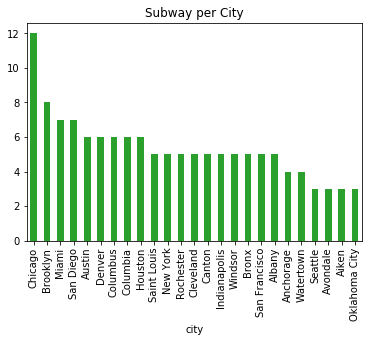

In [176]:
#City with the most Subway
top_subway_city = subway.groupby('city')['city'].count().sort_values(ascending = False).head(25)
top_subway_city.plot.bar(color = base_color)
plt.title('Subway per City');

In [177]:
subway_lon = subway.longitude
subway_lat = subway.latitude
subway_city = subway.city

subway_data = [ dict(
        type = "scattergeo",
        locationmode = "USA-states",
        lon = subway_lon,
        lat = subway_lat,
        mode = "markers",
        marker = dict(
            size = 4,
            opacity = 0.5,
            reversescale = True,
            autocolorscale = False,
            symbol = "circle",
            line = dict(
                width = .5,
                color = "rgba(30, 130, 76, 1)"
            )))]

subway_layout = dict(
        title = "Subway Restaurants in the US",
        colorbar = True,
        geo = dict(
            scope = "usa",
            projection = dict(type = "albers usa"),
            showland = True,
            landcolor = "rgb(250,250,250)",
            subunitcolor = "rgb(217,217,217)",
            countrycolor = "rgb(217,217,217)",
            countrywidth = .5,
            subunitwidth = .5
        ),
    )

fig = dict(data = subway_data, layout = subway_layout)
iplot(fig, validate=False, filename = "subway restaurants")

Summary:

### Arby's 

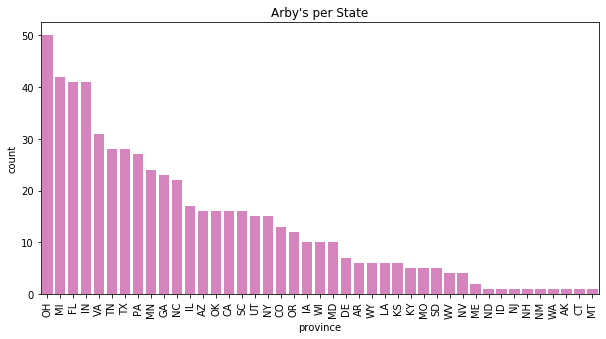

In [178]:
#State/province with the most Arby's
plt.figure(figsize = [10,5])
base_color = sb.color_palette()[6]
state_order = arbys['province'].value_counts().index
sb.countplot(data = arbys, x = 'province', color = base_color, order = state_order)
plt.xticks(rotation=90)
plt.title("Arby's per State");

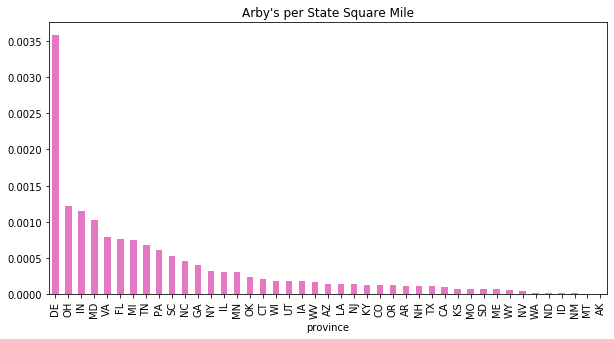

In [179]:
#Arby's per square mile area of each state
grouped_arbys_area = arbys.groupby('province')['per_sq_mile'].sum().sort_values(ascending=False)
plt.figure(figsize = [10,5])
grouped_arbys_area.plot.bar(color = base_color)
plt.title("Arby's per State Square Mile");

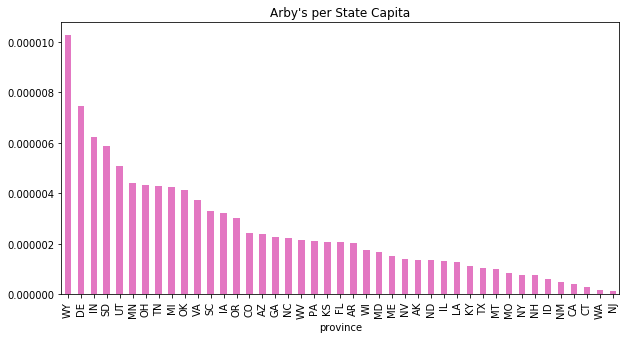

In [180]:
#Arby's per capita of each state
grouped_arbys_capita = arbys.groupby('province')['per_capita'].sum().sort_values(ascending=False)
plt.figure(figsize = [10,5])
grouped_arbys_capita.plot.bar(color = base_color)
plt.title("Arby's per State Capita");

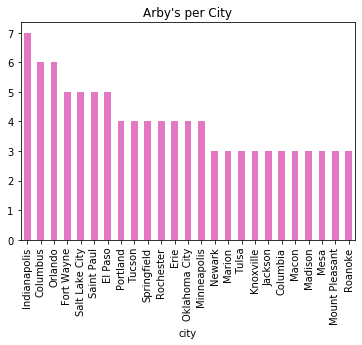

In [181]:
#City with the most Arby's
top_arbys_city = arbys.groupby('city')['city'].count().sort_values(ascending = False).head(25)
top_arbys_city.plot.bar(color = base_color)
plt.title("Arby's per City");

In [182]:
arbys_lon = arbys.longitude
arbys_lat = arbys.latitude
arbys_city = arbys.city

arbys_data = [ dict(
        type = "scattergeo",
        locationmode = "USA-states",
        lon = arbys_lon,
        lat = arbys_lat,
        mode = "markers",
        marker = dict(
            size = 4,
            opacity = 0.5,
            reversescale = True,
            autocolorscale = False,
            symbol = "circle",
            line = dict(
                width = .5,
                color = "rgba(224, 130, 131, 1)"
            )))]

arbys_layout = dict(
        title = "Arby's Restaurants in the US",
        colorbar = True,
        geo = dict(
            scope = "usa",
            projection = dict(type = "albers usa"),
            showland = True,
            landcolor = "rgb(250,250,250)",
            subunitcolor = "rgb(217,217,217)",
            countrycolor = "rgb(217,217,217)",
            countrywidth = .5,
            subunitwidth = .5
        ),
    )

fig = dict(data = arbys_data, layout = arbys_layout)
iplot(fig, validate=False, filename = "arbys restaurants")

Summary:

### Wendy's 

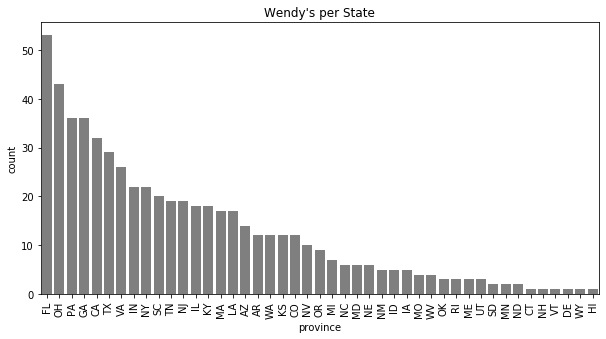

In [183]:
#State/province with the most Wendy's
plt.figure(figsize = [10,5])
base_color = sb.color_palette()[7]
state_order = wendys['province'].value_counts().index
sb.countplot(data = wendys, x = 'province', color = base_color, order = state_order)
plt.xticks(rotation=90)
plt.title("Wendy's per State");

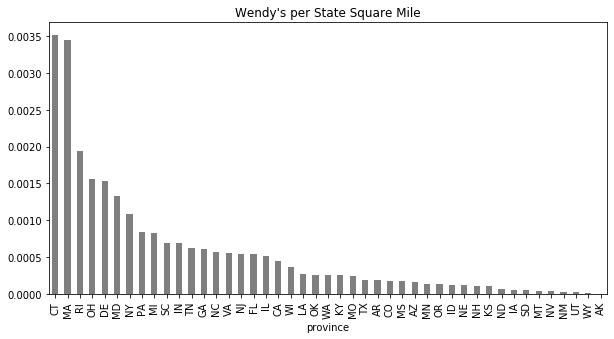

In [184]:
#Wendy's per square mile area of each state
grouped_wendys_area = wendys.groupby('province')['per_sq_mile'].sum().sort_values(ascending=False)
plt.figure(figsize = [10,5])
grouped_subway_area.plot.bar(color = base_color)
plt.title("Wendy's per State Square Mile");

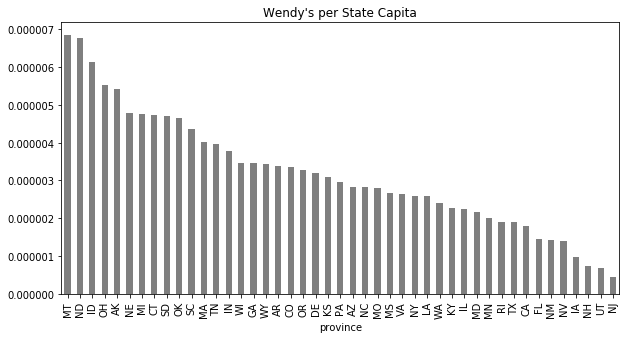

In [185]:
#Wendy's per capita of each state
grouped_wendys_capita = wendys.groupby('province')['per_capita'].sum().sort_values(ascending=False)
plt.figure(figsize = [10,5])
grouped_subway_capita.plot.bar(color = base_color)
plt.title("Wendy's per State Capita");

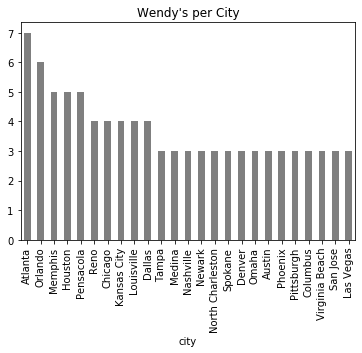

In [186]:
#City with the most Wendy's
top_wendys_city = wendys.groupby('city')['city'].count().sort_values(ascending = False).head(25)
top_wendys_city.plot.bar(color = base_color)
plt.title("Wendy's per City");

In [187]:
wendys_lon = wendys.longitude
wendys_lat = wendys.latitude
wendys_city = wendys.city

wendys_data = [ dict(
        type = "scattergeo",
        locationmode = "USA-states",
        lon = wendys_lon,
        lat = wendys_lat,
        mode = "markers",
        marker = dict(
            size = 4,
            opacity = 0.5,
            reversescale = True,
            autocolorscale = False,
            symbol = "circle",
            line = dict(
                width = .5,
                color = "rgba(46, 49, 49, 1)"
            )))]

wendys_layout = dict(
        title = "Wendy's Restaurants in the US",
        colorbar = True,
        geo = dict(
            scope = "usa",
            projection = dict(type = "albers usa"),
            showland = True,
            landcolor = "rgb(250,250,250)",
            subunitcolor = "rgb(217,217,217)",
            countrycolor = "rgb(217,217,217)",
            countrywidth = .5,
            subunitwidth = .5
        ),
    )

fig = dict(data = wendys_data, layout = wendys_layout)
iplot(fig, validate=False, filename = "arbys restaurants")

Summary:

## In Progress

Calculating Distance Between Locations

In [216]:
# Create a list of just the Latitude and Longitude

# McDonald's
list_mcd_lat = [lat for lat in mcd_lat]
list_mcd_lon = [lon for lon in mcd_lon]

# Taco Bell
list_tcb_lat = [lat for lat in tcb_lat]
list_tcb_lon = [lon for lon in tcb_lon]

# Burger King
list_bk_lat = [lat for lat in bk_lat]
list_bk_lon = [lon for lon in bk_lon]

# Subway
list_subway_lat = [lat for lat in subway_lat]
list_subway_lon = [lon for lon in subway_lon]

# Wendy's
list_wendys_lat = [lat for lat in wendys_lat]
list_wendys_lon = [lon for lon in wendys_lon]

# Arby's
list_arbys_lat = [lat for lat in arbys_lat]
list_arbys_lon = [lon for lon in arbys_lon]

In [217]:
# Function to Calculate Distance Between Two Points

def calc_distance(lat_list, lon_list):
    shortest = 0
    longest = 0
    R = 3958.8 # radius of earth in miles
    
    i = 0
    
    while i < len(lat_list):
        
        j = 0
        
        while i + j < len(lat_list) - 1:

            lat1 = radians(lat_list[i+j])
            lon1 = radians(lon_list[i+j])

            lat2 = radians(lat_list[i+j+1])
            lon2 = radians(lon_list[i+j+1])

            dlon = lon2 - lon1
            dlat = lat2 - lat1

            a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
            c = 2 * atan2(sqrt(a), sqrt(1 - a))

            distance = R * c

            if shortest == 0 or distance < shortest:
                shortest = distance
            else: next
                
            if longest == 0 or distance > longest:
                longest = distance
            else: next
                
            j += 1
            
        i += 1
            
    return round(shortest,2), round(longest,2)

In [219]:
# Calculate the Shortest and Longest Between 2 Restaurants

# McDonald's
calc_distance(list_mcd_lat, list_mcd_lon)

(0.29, 4895.75)

In [220]:
# Taco Bell
calc_distance(list_tcb_lat, list_tcb_lon)

(1.02, 4393.32)

In [221]:
# Burger King
calc_distance(list_bk_lat, list_bk_lon)

(0.45, 4606.92)

In [222]:
# Subway
calc_distance(list_subway_lat, list_subway_lon)

(0.14, 3996.82)

In [223]:
# Wendy's
calc_distance(list_wendys_lat, list_wendys_lon)

(1.12, 4912.73)

In [224]:
# Arby's
calc_distance(list_arbys_lat, list_arbys_lon)

(1.69, 3119.07)